<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning
Data cleaning involves identifying and correcting errors in the dataset, such as dealing with missing or inconsistent data, removing duplicates, and handling outliers.


## CAA
Complete-case analysis (CCA) is a method for handling missing data by removing rows with missing values.
* missing data at random
* missing percentage of data less than 5%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/data_science_job (1).csv')

In [ ]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
data.shape

(19158, 13)

In [ ]:
# Percentage of missing values in each column
data.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
# extract column, where data less than 5% missing values
cols=[col for col in data.columns if data[col].isnull().mean()<0.05 and data[col].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
data[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5820,0.926,no_enrollment,Graduate,6.0,9.0
18163,0.804,Full time course,Graduate,6.0,32.0
6439,0.920,no_enrollment,Graduate,12.0,114.0
15902,0.924,no_enrollment,Graduate,11.0,84.0
16657,0.762,no_enrollment,Masters,20.0,15.0


In [ ]:
# after drop missing data, how much data is left
len(data[cols].dropna()) / len(data)

0.8968577095730244

In [ ]:
# compare data
new_data=data[cols].dropna()
data.shape,new_data.shape

((19158, 13), (17182, 5))

### Analyzie numerical columns after CCA with help of histogram
* ditribution would be same

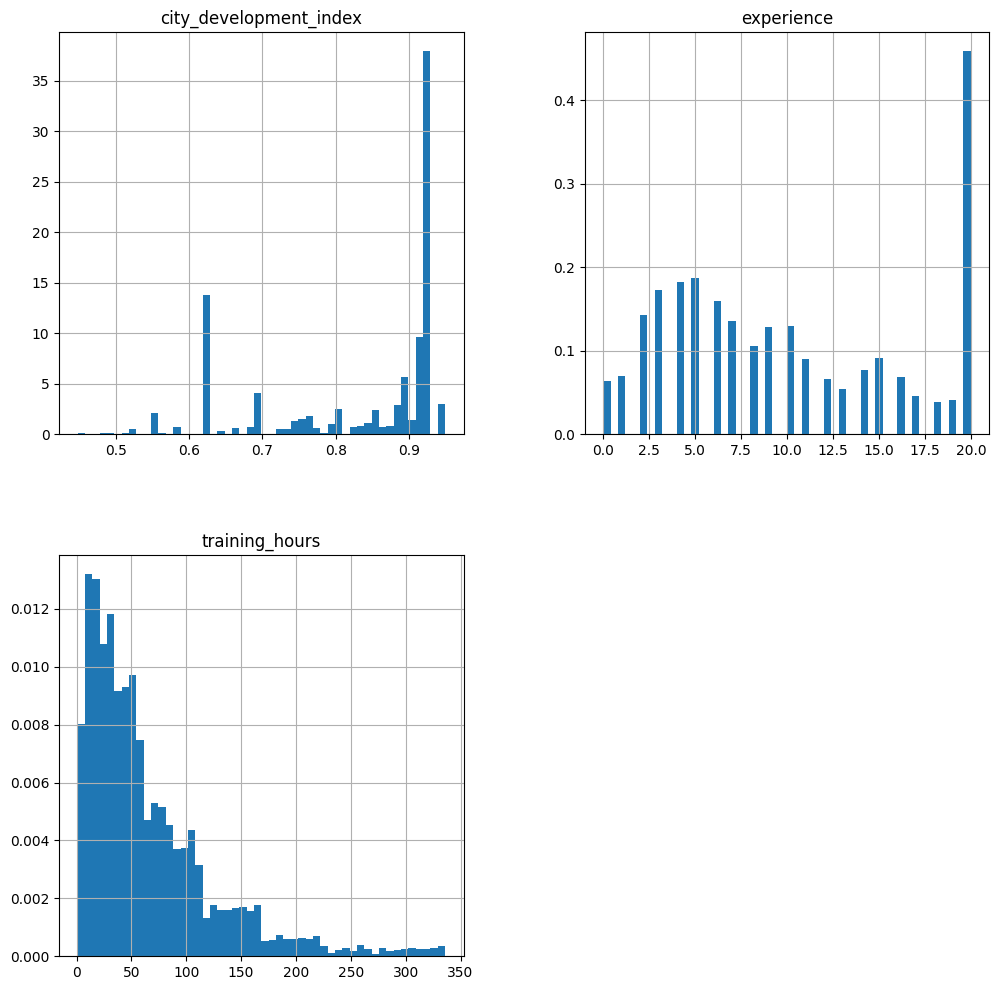

In [ ]:
# perform histogram on new data
new_data.hist(bins=50, density=True, figsize=(12,12))
plt.show()

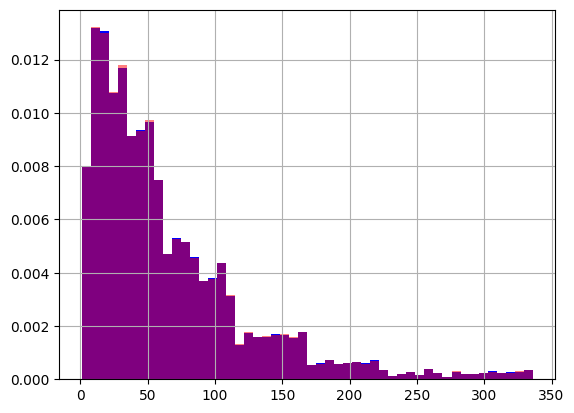

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['training_hours'].hist(bins=50, ax=ax, density=True, color='blue')

# data after CCA
# see the overlapping of the 2 distributions
# aplha- define the transparency
new_data['training_hours'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.5)

plt.show()

<Axes: ylabel='Density'>

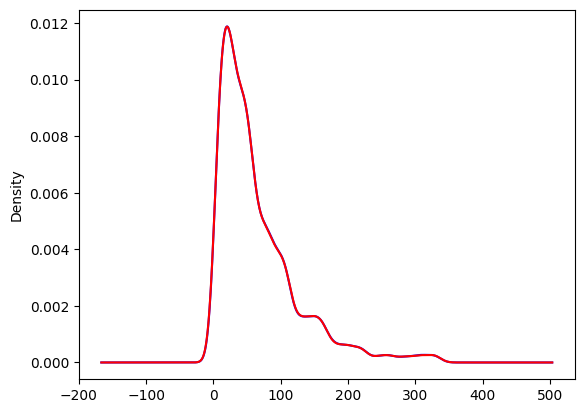

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['training_hours'].plot.density(color='blue')

# data after CCA

new_data['training_hours'].plot.density(color='red')

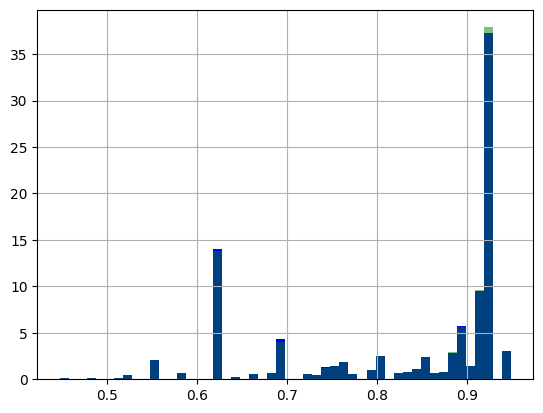

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['city_development_index'].hist(bins=50, ax=ax, density=True, color='blue')

# data after CCA
new_data['city_development_index'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.5)

plt.show()

<Axes: ylabel='Density'>

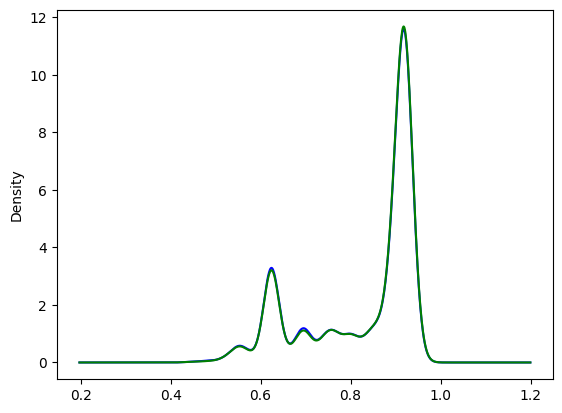

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['city_development_index'].plot.density(color='blue')

# data after CCA

new_data['city_development_index'].plot.density(color='green')

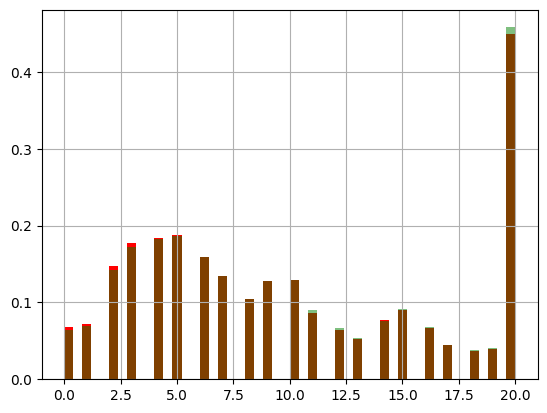

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after CCA
new_data['experience'].hist(bins=50, ax=ax, density=True, color='green', alpha=0.5)

plt.show()

<Axes: ylabel='Density'>

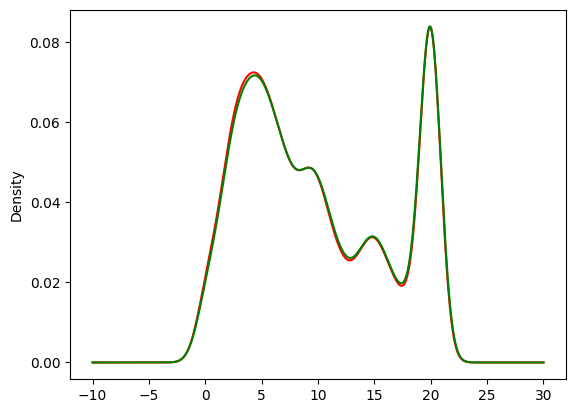

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['experience'].plot.density(color='red')

# data after CCA

new_data['experience'].plot.density(color='green')

### analyze categorical columns after CCA
* maintain ration

In [ ]:
temp=pd.concat([
    # percentage of observations per category, original data
    data['enrolled_university'].value_counts() / len(data),

    # percentage of observations per category, CCA data
    new_data['enrolled_university'].value_counts() / len(new_data)
  ],
  axis=1)
temp.columns=['original', 'CCA']
temp

,original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp=pd.concat([
    # percentage of observations per category, original data
    data['education_level'].value_counts() / len(data),

    # percentage of observations per category, CCA data
    new_data['education_level'].value_counts() / len(new_data)
  ],
  axis=1)
temp.columns=['original', 'CCA']
temp

,original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


## Impute Value(Numerical column)

### Arbitary value
**choose a random value**
* when data is not missing random
* create diffrence

### Impute mean/ median

#### using pandas

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [ ]:
data=pd.read_csv('/content/placement-dataset.csv')

In [ ]:
data.sample(5)

,city,cgpa,iq,placement
37,Los Angeles,8.1,149.0,1
44,Chicago,7.5,61.0,1
50,Chicago,3.5,233.0,0
25,Los Angeles,5.0,91.0,0
19,Los Angeles,5.2,132.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       92 non-null     float64
 2   iq         96 non-null     float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
data.isnull().mean()*100

,0
city,0.0
cgpa,8.0
iq,4.0
placement,0.0


In [ ]:
X=data.drop(columns=['placement','city'])
y=data['placement']

In [ ]:
X.sample(5)

,cgpa,iq
25,5.0,91.0
20,6.6,120.0
2,NaN,121.0
60,NaN,1.0
15,5.1,176.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [ ]:
X_train.shape,X_test.shape

((90, 2), (10, 2))

In [ ]:
X_train.isnull().mean()*100

,0
cgpa,6.666667
iq,4.444444


In [ ]:
# calculate mean and median
mean_cgpa = X_train['cgpa'].mean()
median_cgpa = X_train['cgpa'].median()

mean_iq = X_train['iq'].mean()
median_iq = X_train['iq'].median()


In [ ]:
# impute mean and median value
X_train['cgpa_mean'] = X_train['cgpa'].fillna(mean_cgpa)
X_train['cgpa_median'] = X_train['cgpa'].fillna(median_cgpa)

X_train['iq_mean'] = X_train['iq'].fillna(mean_iq)
X_train['iq_median'] = X_train['iq'].fillna(median_iq)

In [ ]:
X_train.sample(5)

,cgpa,iq,cgpa_mean,cgpa_median,iq_mean,iq_median
74,6.7,154.0,6.7,6.7,154.0,154.0
68,4.0,75.0,4.0,4.0,75.0,75.0
66,6.9,96.0,6.9,6.9,96.0,96.0
92,5.2,110.0,5.2,5.2,110.0,110.0
10,6.0,45.0,6.0,6.0,45.0,45.0


In [ ]:
print('original CGPA variable variancce: ',X_train['cgpa'].var())
print('CGPA variance after mean immputaion: ',X_train['cgpa_mean'].var())
print('CGPA variance after median immputaion: ',X_train['cgpa_median'].var())
print('\n')

print('original IQ variable variancce: ',X_train['iq'].var())
print('IQ variance after mean immputaion: ',X_train['iq_mean'].var())
print('IQ variance after median immputaion: ',X_train['iq_median'].var())

original CGPA variable variancce:  1.3911919104991393
CGPA variance after mean immputaion:  1.297403691813804
CGPA variance after median immputaion:  1.2975393258426966


original IQ variable variancce:  2270.3359781121753
IQ variance after mean immputaion:  2168.2984060621898
IQ variance after median immputaion:  2170.647191011236


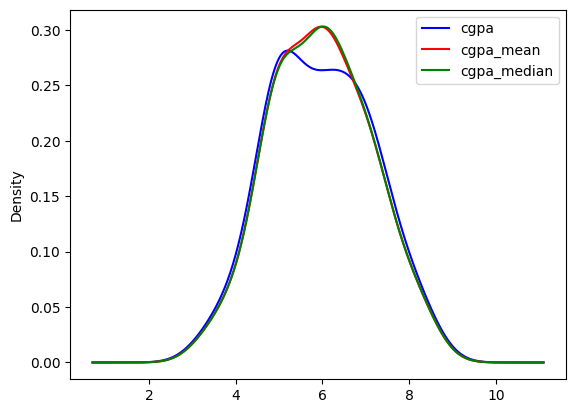

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['cgpa'].plot(kind='kde', ax=ax, color='blue')
X_train['cgpa_mean'].plot(kind='kde', ax=ax, color='red')
X_train['cgpa_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

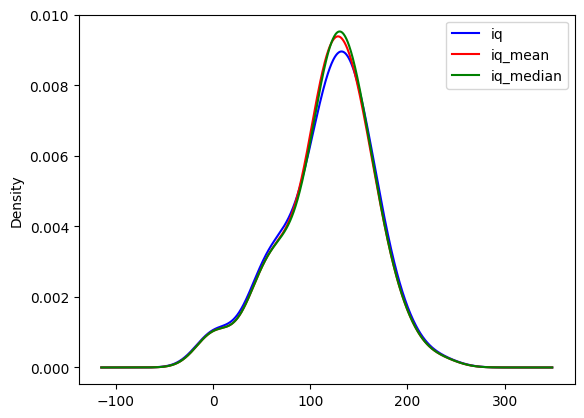

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['iq'].plot(kind='kde', ax=ax, color='blue')
X_train['iq_mean'].plot(kind='kde', ax=ax, color='red')
X_train['iq_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
X_train.cov()

,cgpa,iq,cgpa_mean,cgpa_median,iq_mean,iq_median
cgpa,1.391192,-6.516519,1.391192,1.391192,-5.987834,-6.265318
iq,-6.516519,2270.335978,-5.846944,-6.096908,2270.335978,2270.335978
cgpa_mean,1.391192,-5.846944,1.297404,1.297404,-5.584160,-5.842937
cgpa_median,1.391192,-6.096908,1.297404,1.297539,-5.822890,-6.082697
iq_mean,-5.987834,2270.335978,-5.584160,-5.822890,2168.298406,2168.298406
iq_median,-6.265318,2270.335978,-5.842937,-6.082697,2168.298406,2170.647191


In [ ]:
X_train.corr()

,cgpa,iq,cgpa_mean,cgpa_median,iq_mean,iq_median
cgpa,1.000000,-0.133283,1.000000,1.000000,-0.125720,-0.131602
iq,-0.133283,1.000000,-0.107701,-0.112309,1.000000,1.000000
cgpa_mean,1.000000,-0.107701,1.000000,0.999948,-0.105284,-0.110103
cgpa_median,1.000000,-0.112309,0.999948,1.000000,-0.109779,-0.114615
iq_mean,-0.125720,1.000000,-0.105284,-0.109779,1.000000,0.999459
iq_median,-0.131602,1.000000,-0.110103,-0.114615,0.999459,1.000000


<Axes: >

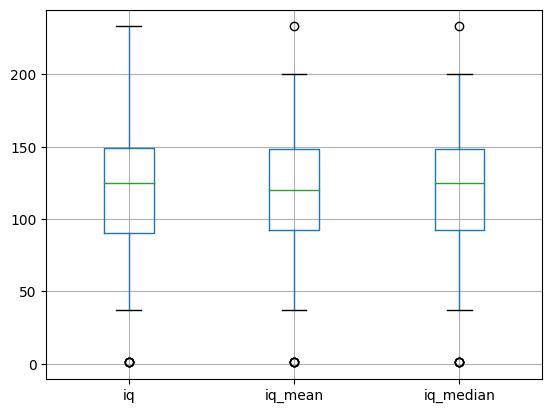

In [ ]:
X_train[['iq','iq_mean','iq_median']].boxplot()

<Axes: >

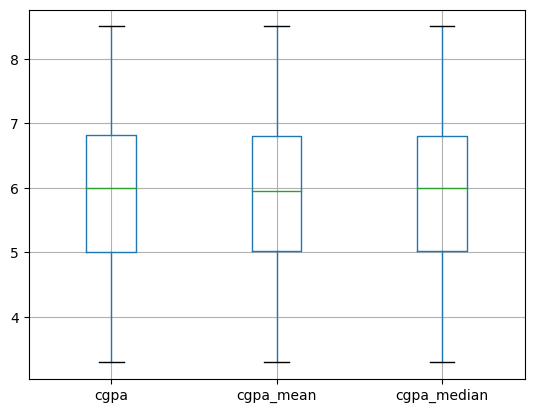

In [ ]:
X_train[['cgpa','cgpa_mean','cgpa_median']].boxplot()

#### Using SKLearn

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=2,test_size=0.2)

In [ ]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [ ]:
trf=ColumnTransformer([
    ('imputer1', imputer1,['cgpa']),
    ('imputer2',imputer2,['iq'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['cgpa']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['iq'])])

In [ ]:
# mean value of CGPA
trf.named_transformers_['imputer1'].statistics_

array([5.91168831])

In [ ]:
# median values of IQ
trf.named_transformers_['imputer2'].statistics_

array([127.5])

In [ ]:
X_train=trf.transform(X_train)

In [ ]:
X_test = trf.transform(X_test)

In [ ]:
X_train

array([[  6.8       ,  90.        ],
       [  6.9       , 138.        ],
       [  5.7       , 169.        ],
       [  7.5       ,  61.        ],
       [  4.9       ,  61.        ],
       [  7.1       ,  48.        ],
       [  5.        ,  91.        ],
       [  7.3       ,  50.        ],
       [  6.7       , 154.        ],
       [  6.        , 102.        ],
       [  8.1       , 166.        ],
       [  5.9       , 106.        ],
       [  4.        , 127.5       ],
       [  6.6       , 138.        ],
       [  5.7       , 140.        ],
       [  6.1       ,  81.        ],
       [  5.7       , 127.5       ],
       [  4.9       , 127.5       ],
       [  7.5       , 158.        ],
       [  6.        ,  45.        ],
       [  5.4       , 139.        ],
       [  8.3       , 168.        ],
       [  5.7       , 132.        ],
       [  6.4       , 141.        ],
       [  4.3       , 200.        ],
       [  7.        , 139.        ],
       [  5.2       , 132.        ],
 

## Impute Value(Categorical columns)

### Frequent value imputation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/data_science_job (1).csv',usecols=['gender','company_type','enrolled_university','target'])

In [ ]:
data.shape

(19158, 4)

In [ ]:
data.sample(5)

,gender,enrolled_university,company_type,target
5278,Male,no_enrollment,Pvt Ltd,0.0
18317,NaN,no_enrollment,NaN,0.0
13904,Male,no_enrollment,Pvt Ltd,0.0
11064,Male,Full time course,NaN,1.0
16142,Male,no_enrollment,Pvt Ltd,0.0


In [ ]:
data.isnull().mean()*100

,0
gender,23.530640
enrolled_university,2.014824
company_type,32.049274
target,0.000000


In [ ]:
data['company_type'].value_counts()

,count
company_type,
Pvt Ltd,9817
Funded Startup,1001
Public Sector,955
Early Stage Startup,603
NGO,521
Other,121


<Axes: xlabel='company_type'>

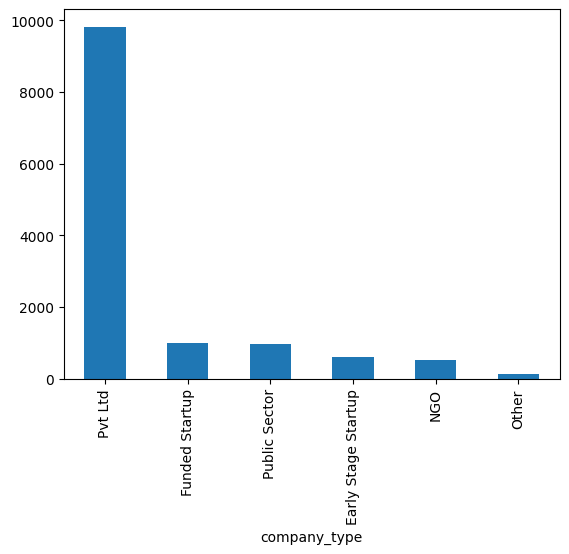

In [ ]:
data['company_type'].value_counts().plot(kind='bar')

In [ ]:
data['company_type'].mode()

,company_type
0,Pvt Ltd


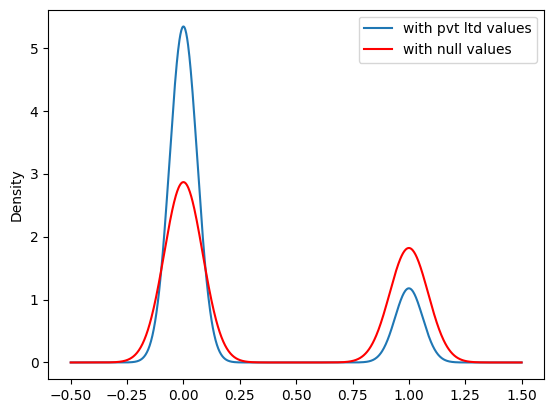

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# in target columns, where company type is Pvt Lts
data[data['company_type']=='Pvt Ltd']['target'].plot(kind='kde',ax=ax)

# in target column, where value is null
data[data['company_type'].isnull()]['target'].plot(kind='kde',ax=ax,color='red')

lines, labelss = ax.get_legend_handles_labels()
labels = ['with pvt ltd values', 'with null values']
ax.legend(lines, labels, loc='best')

In [ ]:
temp = data[data['company_type'] == 'Pvt Ltd']['target']

In [ ]:
data['company_type'].fillna('Pvt Ltd', inplace=True)

<Axes: xlabel='company_type'>

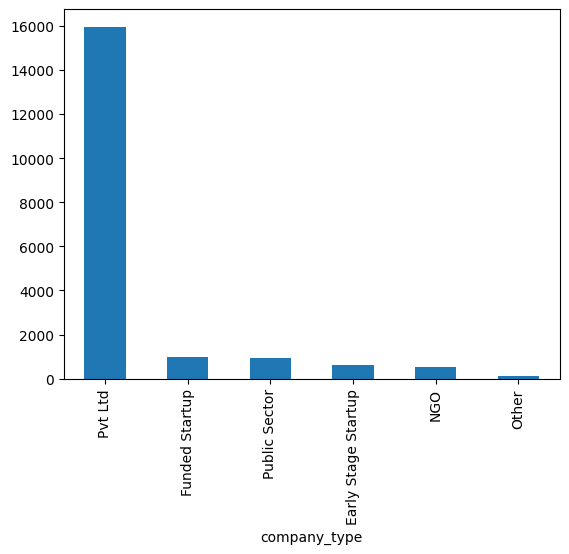

In [ ]:
data['company_type'].value_counts().plot(kind='bar')

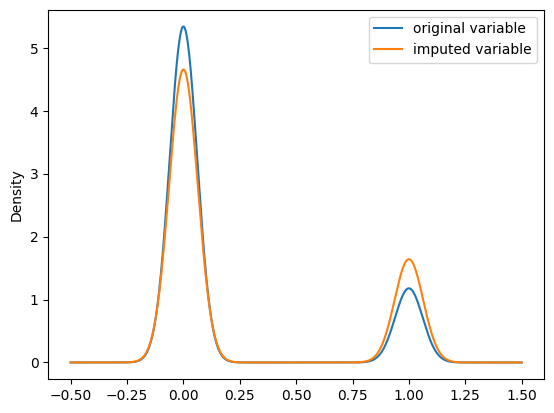

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# in target columns, where company type is Pvt Lts
# distribution of the variable after imputation
data[data['company_type']=='Pvt Ltd']['target'].plot(kind='kde', ax=ax)

lines, labelss = ax.get_legend_handles_labels()
labels = ['original variable', 'imputed variable']
ax.legend(lines, labels, loc='best')

In [ ]:
data['company_type'].isnull().sum()

0

## Random Imputation


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/train (1).csv', usecols=['Age', 'Fare', 'Survived'])

In [ ]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
data.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [ ]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [ ]:
X_train.sample(5)

,Age,Fare,Age_imputed
50,7.0,39.6875,7.0
687,19.0,10.1708,19.0
727,NaN,7.7375,NaN
255,29.0,15.2458,29.0
153,40.5,14.5000,40.5


In [ ]:
# this piece of code find all null values in  column
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

,Age_imputed
77,NaN
868,NaN
334,NaN
295,NaN
792,NaN
...,...
674,NaN
466,NaN
584,NaN
527,NaN


In [ ]:
# this piace of code find random values from Age column
# random value is equal to null values
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 4. , 22. , 33. , 31. , 26. , 19. , 42. , 25. , 44. , 39. , 32. ,
       38. , 60. , 32. , 24. , 21. , 31. , 23. , 49. , 65. , 56. , 62. ,
       26. , 30. , 19. , 18. , 26. , 25. , 45. , 47. ,  3. , 21. , 28. ,
       25. , 28. , 62. , 34. , 23. , 34. , 19. , 38. , 14. , 24. , 35. ,
       13. , 35. , 34. , 36. , 50. , 39. , 32. , 14. , 65. , 48. , 22. ,
       56. , 21. , 48. , 16. , 25. , 19. , 34. , 19. , 27. , 36. , 30.5,
       21. , 40. , 40. , 24. , 30. , 37. , 50. ,  2. , 34. , 24. , 16. ,
       39. , 19. , 60. , 58. , 70. , 33. , 29. , 20. , 45. , 33. ,  2. ,
       16. , 21. , 54. ,  9. , 23. , 18. ,  3. , 32. , 38. , 18. ,  9. ,
       33. , 26. , 33. , 24. , 54. , 24. , 23. , 28. , 14. , 25. ,  4. ,
       22. , 31. , 28. , 32. , 40. , 30. , 11. , 42. , 33. , 28. , 29. ,
       45. , 36. , 18. , 31. , 31. , 23. , 36. , 19. , 27. , 29. , 59. ,
       22. , 39. , 32. , 16. , 22. , 28. , 12. , 21. , 16. , 14. , 21. ,
       35. , 21. , 29. , 28.5, 39. ])

In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [ ]:
# we can see, now age_imputed column have no null values
X_train.isnull().mean()*100

,0
Age,20.786517
Fare,0.000000
Age_imputed,0.000000


<ipython-input-25-ec5353a693d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='original', hist=False)
<ipython-input-25-ec5353a693d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)


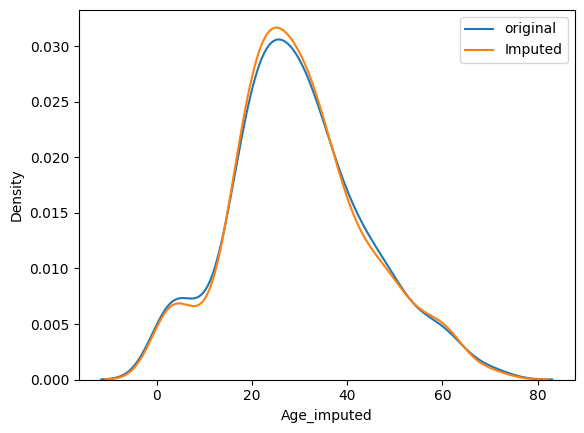

In [ ]:
sns.distplot(X_train['Age'], label='original', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()

In [ ]:
print('Original variable variance:', X_train['Age'].var())
print('variance after random imputation', X_train['Age_imputed'].var())

Original variable variance: 204.34951339046142
variance after random imputation 198.4010597923482


In [ ]:
X_train[['Age', 'Fare','Age_imputed']].cov()

,Age,Fare,Age_imputed
Age,204.349513,71.512440,204.349513
Fare,71.512440,2368.246832,56.632562
Age_imputed,204.349513,56.632562,198.401060


<Axes: >

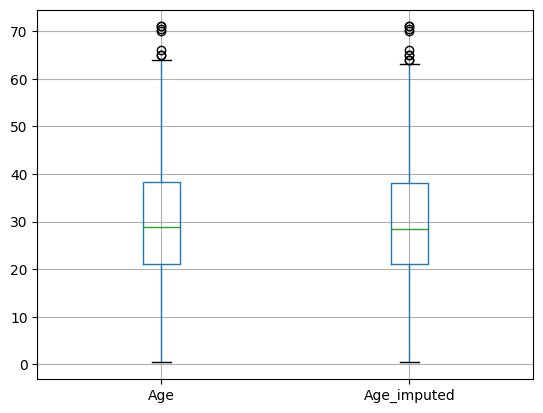

In [ ]:
X_train[['Age', 'Age_imputed']].boxplot()